How can a chord be characterized in the circular pitch space?
Some chord prototypes are investigated to see how they are displayed in the pitch space.
There are 37 circles in the pitch space and we want to investigate how we can pick the ones that carry the most information

We can create "ideal" templates or a more real scenario with some noise

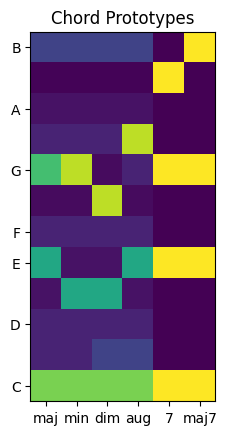

In [94]:
import circularPitchSpace as cps
import mir_eval
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1 import make_axes_locatable

# analyze chord prototypes for C-chords
# major = mir_eval.chord.quality_to_bitmap("maj")
major = [0.8,0.1,0.1,0.05,0.6,0.10,0.03,0.7,0.1,0.05,0.01,0.2]
# minor = mir_eval.chord.quality_to_bitmap("min")
minor = [0.8,0.1,0.1,0.6,0.05,0.10,0.03,0.9,0.1,0.05,0.01,0.2]
dim = mir_eval.chord.quality_to_bitmap("dim")
dim = [0.8,0.2,0.1,0.6,0.05,0.10,0.9,0.03,0.1,0.05,0.01,0.2]
aug = mir_eval.chord.quality_to_bitmap("aug")
aug = [0.8,0.2,0.1,0.05,0.6,0.10,0.03,0.1,0.9,0.05,0.01,0.2]
seventh = mir_eval.chord.quality_to_bitmap("7")
majseventh = mir_eval.chord.quality_to_bitmap("maj7")
sus4 = mir_eval.chord.quality_to_bitmap("sus4")

chroma = np.array([major,minor,dim,aug,seventh,majseventh],dtype=float)
fig,ax = plt.subplots()
ax.imshow(chroma.T,origin = 'lower')
ax.set_yticks([0,2,4,5,7,9,11])
ax.set_yticklabels(["C","D","E","F","G","A","B"])
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(["maj","min","dim","aug","7","maj7"])
ax.set_title("Chord Prototypes");

First we investigate the Pitch class energy for every ideal chroma template. The pitch class energy is a measure the determine in which key this chord is a tonic! The energy of a pitch class is high when there is a lot of energy in chroma bins that belong to the scale of this pitch class. It can be used as a feature in a Key estimation algorithm. Two parameters have to be adjusted:
The energy treshold of a pitch class (if it is high, more pitch classes are considered for further evaluation) and the angle weight (a small value puts more emphasis on bins that correspond to the tonic of the key)  

Text(0.5, 1.0, 'Pitch class Energy')

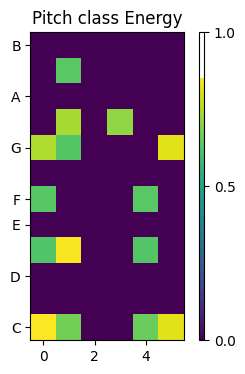

In [95]:

pitchclass_energy = cps.getPitchClassEnergyProfile(chroma,threshold=0.6,angle_weight=0.5)
fig,ax = plt.subplots(figsize=(7,4))
img = ax.imshow(pitchclass_energy.T,origin='lower')
ax.set_yticks([0,2,4,5,7,9,11])
ax.set_yticklabels(["C","D","E","F","G","A","B"])
# Divide existing axes and create new axes at right side of image
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.15)
colorbar = fig.colorbar(img,cax=cax)
colorbar.set_ticks([0, 0.5, 1])
ax.set_title("Pitch class Energy")




We see a large pitch class energy for the C-major chord in the key of C.
For the C-minor chord, the pitch class D#/Eb is dominant, which is the relative major key of C-minor. This also fits the picture. Unfortunately for other chords (except the C-maj7) we cannot gain any more information with this feature, as these chords borrow notes from other pitch classes as well and therefore we cannot be certain which keys to consider for analyzing the chord. Let's focus on analyzing Major and minor chords first, as they are the most important fundamental chords in most songs. 

First we pick the most likely pitch class for C-major and C-minor (C and D#).
Then we transform the chroma bins on to the circular pitch space and plot the key related circles 

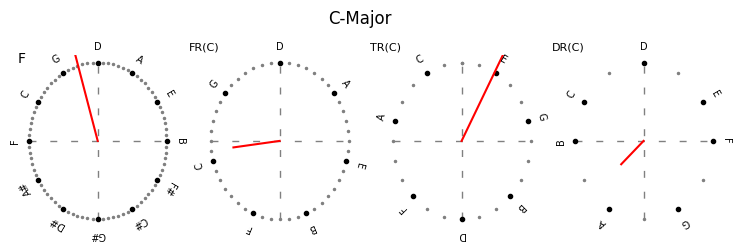

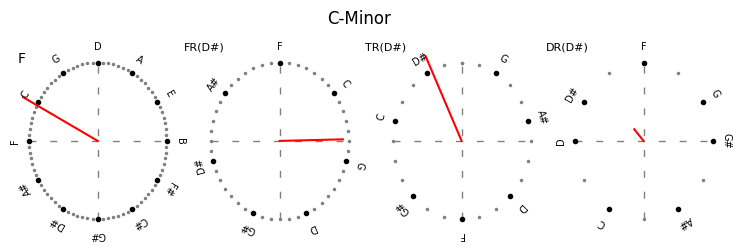

In [96]:
# pick the most likely pitch classes
max_energy = np.argmax(pitchclass_energy[:2],axis=1)
pitch_class,count = np.unique(max_energy,return_counts=True)

cps_features = cps.transformChroma(chroma[:2,:])  # major /minor templates
r_F,r_FR,r_TR,r_DR = cps_features
fig,ax = plt.subplots(1,4,figsize=(9,2.5))
cps.plotCircleOfFifths(ax[0])
z = r_F[0]*1j 
ax[0].plot([0,z.real],[0,z.imag],'r-',markersize=2)
cps.plotCircleOfFifthsRelated(ax[1],max_energy[0])
z = r_FR[0,max_energy[0]]*1j
ax[1].plot([0,z.real],[0,z.imag],'r-',markersize=2)
cps.plotCircleOfThirdsRelated(ax[2],max_energy[0])
z = r_TR[0,max_energy[0]]*1j
ax[2].plot([0,z.real],[0,z.imag],'r-',markersize=2)
cps.plotCircleOfDiatonicRelated(ax[3],max_energy[0])
z = r_DR[1,max_energy[0]]*1j
ax[3].plot([0,z.real],[0,z.imag],'r-',markersize=2)
plt.subplots_adjust(top=0.8)  # Increase or decrease the value as needed
fig.suptitle(f"C-Major")
for x in ax:
    x.set_xlim(-1.1,1.1)
    x.set_ylim(-1.1,1.1)

fig,ax = plt.subplots(1,4,figsize=(9,2.5))
cps.plotCircleOfFifths(ax[0])
z = r_F[1]*1j 
ax[0].plot([0,z.real],[0,z.imag],'r-',markersize=2)
cps.plotCircleOfFifthsRelated(ax[1],max_energy[1])
z = r_FR[1,max_energy[1]]*1j
ax[1].plot([0,z.real],[0,z.imag],'r-',markersize=2)
cps.plotCircleOfThirdsRelated(ax[2],max_energy[1])
z = r_TR[1,max_energy[1]]*1j
ax[2].plot([0,z.real],[0,z.imag],'r-',markersize=2)
cps.plotCircleOfDiatonicRelated(ax[3],max_energy[1])
z = r_DR[1,max_energy[1]]*1j
ax[3].plot([0,z.real],[0,z.imag],'r-',markersize=2)
plt.subplots_adjust(top=0.8)  # Increase or decrease the value as needed
fig.suptitle(f"C-Minor")
for x in ax:
    x.set_xlim(-1.1,1.1)
    x.set_ylim(-1.1,1.1)

In the thesis, gatzsche and mahnert describe that the related circle of fifth can be used to identify a major or a minor chord. If sum vector is on the right side of the circle, it's a minor chord and vice cersa. The third related circle can be used to identify if a triad is tonic,dominant or subdominant in this key. The sum vector in the diatonic related circle has no useful meaning for harmonic analysis, but the individual elements encode information about the pitch class energy. Let's investigate this by displaying all chords of the C-major key and see what we find

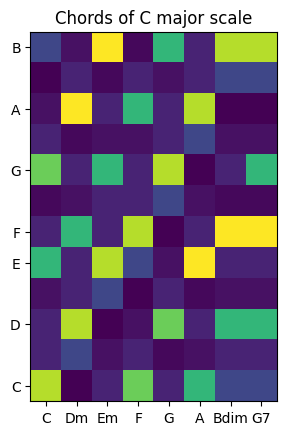

In [104]:
major = [0.8,0.1,0.1,0.05,0.6,0.10,0.03,0.7,0.1,0.05,0.01,0.2]
minor = [0.8,0.1,0.1,0.6,0.05,0.10,0.03,0.9,0.1,0.05,0.01,0.2]
dim = [0.8,0.2,0.1,0.6,0.05,0.10,0.9,0.03,0.1,0.05,0.01,0.2]
seventh = [0.8,0.2,0.1,0.6,0.05,0.10,0.9,0.03,0.6,0.05,0.01,0.2]
C = major
D = np.roll(minor,2)
E = np.roll(minor,4)
F = np.roll(major,5)
G = np.roll(major,7)
A = np.roll(minor,9)
B = np.roll(dim,11)
G7 = np.roll(seventh,11)
chroma = np.array([C,D,E,F,G,A,B,G7])
fig,ax = plt.subplots()
ax.imshow(chroma.T,origin = 'lower')
ax.set_yticks([0,2,4,5,7,9,11])
ax.set_yticklabels(["C","D","E","F","G","A","B"])
ax.set_xticks([0,1,2,3,4,5,6,7])
ax.set_xticklabels(["C","Dm","Em","F","G","A","Bdim","G7"])
ax.set_title("Chords of C major scale");


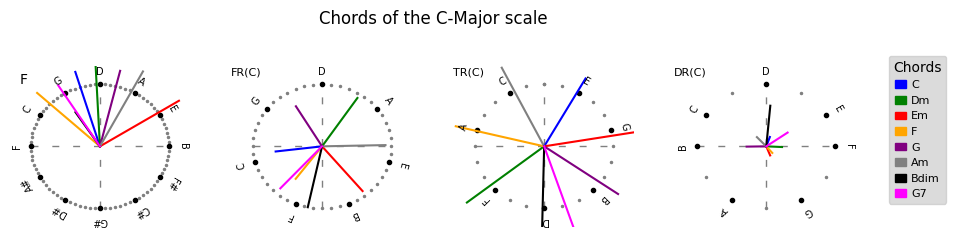

In [106]:


cps_features = cps.transformChroma(chroma) 
r_F,r_FR,r_TR,r_DR = cps_features
colors = ["blue","green","red","orange","purple","grey","black","magenta"]
labels = ["C","Dm","Em","F","G","Am","Bdim","G7"]
legend_handles = [Patch(color=color) for color in colors]

fig,ax = plt.subplots(1,4,figsize=(9,2.5))
cps.plotCircleOfFifths(ax[0])
cps.plotCircleOfFifthsRelated(ax[1],0)
cps.plotCircleOfThirdsRelated(ax[2],0)
cps.plotCircleOfDiatonicRelated(ax[3],0)
for t in range(r_F.shape[0]):
    z = r_F[t]*1j 
    ax[0].plot([0,z.real],[0,z.imag],'-',color=colors[t],markersize=2)
    z = r_FR[t,max_energy[0]]*1j
    ax[1].plot([0,z.real],[0,z.imag],'-',color=colors[t],markersize=2)
    z = r_TR[t,max_energy[0]]*1j
    ax[2].plot([0,z.real],[0,z.imag],'-',color=colors[t],markersize=2)
    z = r_DR[t,max_energy[0]]*1j
    ax[3].plot([0,z.real],[0,z.imag],'-',color=colors[t],markersize=2)
plt.subplots_adjust(top=0.8)  # Increase or decrease the value as needed
fig.legend(legend_handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), title='Chords', handlelength=1, handletextpad=0.5, fontsize=8, title_fontsize=10, facecolor='lightgray', framealpha=0.8)
fig.suptitle(f"Chords of the C-Major scale")
plt.tight_layout()
for x in ax:
    x.set_xlim(-1.3,1.3)
    x.set_ylim(-1.3,1.3)


This result shows that in theory the circular pitch space is suited for harmonic analysis! we can see the major chords appear on the left side of the fifth related Circle, and the minor chords on the right side. The diminished triad somehow stands out, but if we consider tetrads it is part of the G7 chord. The third related circle represents the harmonic function the chord has in this key! Tonic, dominant and subdominant functions can be clearly separated!

Now let's look at the harmonic minor scale

In [ ]:
# TODO...